<a href="https://colab.research.google.com/github/rtegao/CNN-Specialization/blob/master/T4_Gerador_dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Trabalho #4 - Gerador de dados

Nesse trabalho você vai treinar uma RNA para realizar uma tarefa de classificação de múltiplas classes. A tarefa consiste em identificar três tipos de animais: gato, cachorro e panda. Esse problema foi proposto no Kaggle em 2019 e pode ser acessado em https://www.kaggle.com/ashishsaxena2209/animal-image-datasetdog-cat-and-panda.

A diferença principal desse trabalho em relação aos outros já realizados até o momento, é a utilização de imagens reias, que possuem dimensões e proporções diferentes, objetos não centrados, luminosidades diferentes etc.

Nesse trabalho para processar as imagens de forma a normalizá-las e redimensioná-las para que tenham dimensão uniforme são usados geradores de dados. Além disso, para eliminar problemas de "overfitting" é também parte desse trabalho treinar uma RNA com geração artificial de dados.

Esse trabalho é dividio nas seguintes etapas:

1. Explorar as imagens do conjunto de dados;
2. Construir e treinar uma RNA para identificar o animal mostrado na imagem;
3. Treinar uma nova RNA para identificar o animal mostrado usando geração artificial de dados;
4. Avaliar e comparar o desempenho das duas RNAs.

## Coloque os nomes e RAs dos alunos que fizeram esse trabalho

Nome e número dos alunos da equipe:

Aluno 1:Ricardo Rossi Tegao 20.83988-0

Aluno 2: 

## 1. Imagens do conjunto de dados

A primeira etapa do trabalho é carregar o conjunto de dados, que consiste em um arquipo tipo zip de 3.000 fotos no formato JPG de gatos, cães e pandas, e extrair localmente no diretório `tmp`.

**NOTA:** As 3.000 imagens usadas neste trabalho foram extraídas do conjunto de dados "Dogs-Cats-Pandas", disponível no Kaggle, no link https://www.kaggle.com/ashishsaxena2209/animal-image-datasetdog-cat-and-panda.

### Carregar arquivo de dados para o Colab

Execute a célula abaixo para carregar as imagens para o seu Colab. Após a execução dessa célula as imagens estão no arquivo `cats_dogs_pandas.zip` no diteório `tmp` do seu ambiente do Colab.

**Importante:** se você estiver usando o notebook Jupiter do Anaconda essa célula não deve ser executada e o arquivo compactado com os dados deve estar no subdiretório `tmp` do diretório onde se encontra o seu notebook.

In [4]:
!pip install gdown
!gdown --id 107HRcULeYsB_qSQ2l55AAL3lJtGvEYb7 -O /tmp/cat_dog_panda.zip

Downloading...
From: https://drive.google.com/uc?id=107HRcULeYsB_qSQ2l55AAL3lJtGvEYb7
To: /tmp/cat_dog_panda.zip
197MB [00:03, 49.7MB/s]


Execute a célula abaixo para descompactar o arquivo com as imagens. O código usa a biblioteca `os`, que possui funções do sistema operacional que fornecem acesso ao sistema de arquivos, e a biblioteca zipfile que permite descompactar arquivos.

In [0]:
import os
import zipfile

local_zip = '/tmp/cat_dog_panda.zip'

zip_ref = zipfile.ZipFile(local_zip, 'r')

zip_ref.extractall('/tmp')
zip_ref.close()

O conteúdo do arquivo `cat_dog_panda.zip` é extraído para o diretório `/tmp/cat_dog_panda`, que contém os subdiretórios `train`, `val` e `test` com as imagens dos conjuntos de dados de treinamento, validação e teste.

Lembre que, conforme visto na aula, o gerador `ImageDataGenerator` do Keras identifica e cataloga as imagens automaticamente a partir dos subdiretórios onde elas se encontram. Assim, por exemplo, no diretório `train` existe um diretório `cats`, um ditetório `dogs` e outro `pandas`. O `ImageGenerator` rotula automaticamente as imagens, simplificando a etapa de codificação dos dados.

**Importante:** 

O Keras fornece rótulos para classes de acordo com a ordem que os subdiretórios estão nos diretórios `train`, `val` e `pandas`. Assim, se o subdiretório `cats` é o primeiro então, os gatos serão a classe 0.

### Exercíco #1: Definir os nomes dos diretórios

Complete a célula de código abaixo para criar variáveis com os nomes dos diretórios e subdiretórios com as imagens de treinamento, validação e teste. Para isso utilize a  função `path.join(diretório_base, subdiretório)` da biblioteca `os` (https://docs.python.org/2/library/os.path.html).

In [6]:
# PARA VOCÊ FAZER: definir nomes dos diretórios

import os

# Nome do diretório base
base_dir = '/tmp/cat_dog_panda'

# Path dos diretórios de treinamento, validação e teste
### COMECE AQUI ### (≈ 3 linhas)
train_dir = base_dir + '/train/'
val_dir = base_dir + '/val/'
test_dir = base_dir + '/test/'
### TERMINE AQUI ####

# Path dos subdiretórios com as imagens do dados de treinamento
### COMECE AQUI ### (≈ 3 linhas)
train_cats_dir = train_dir + 'cats'
train_dogs_dir = train_dir + 'dogs'
train_pandas_dir = train_dir + 'pandas'
### TERMINE AQUI ####

# Path dos subdiretórios com as imagens do dados de validação
### COMECE AQUI ### (≈ 3 linhas)
val_cats_dir = val_dir + 'cats'
val_dogs_dir = val_dir + 'dogs'
val_pandas_dir = val_dir + 'pandas'
### TERMINE AQUI ####

# Path dos subdiretórios com as imagens do dados de teste
### COMECE AQUI ### (≈ 3 linhas)
test_cats_dir = test_dir + 'cats'
test_dogs_dir = test_dir + 'dogs'
test_pandas_dir = test_dir + 'pandas'
### TERMINE AQUI ####

print('Subdiretório de imagens de gatos para treinamento =', train_cats_dir)
print('Subdiretório de imagens de cães para treinamento =', train_dogs_dir)
print('Subdiretório de imagens de pandas para treinamento =', train_pandas_dir)
print('Subdiretório de imagens de gatos para validação =', val_cats_dir)
print('Subdiretório de imagens de cães para validação =', val_dogs_dir)
print('Subdiretório de imagens de pandas para validação =', val_pandas_dir)
print('Subdiretório de imagens de gatos para teste =', test_cats_dir)
print('Subdiretório de imagens de cães para teste =', test_dogs_dir)
print('Subdiretório de imagens de pandas para teste =', test_pandas_dir)

Subdiretório de imagens de gatos para treinamento = /tmp/cat_dog_panda/train/cats
Subdiretório de imagens de cães para treinamento = /tmp/cat_dog_panda/train/dogs
Subdiretório de imagens de pandas para treinamento = /tmp/cat_dog_panda/train/pandas
Subdiretório de imagens de gatos para validação = /tmp/cat_dog_panda/val/cats
Subdiretório de imagens de cães para validação = /tmp/cat_dog_panda/val/dogs
Subdiretório de imagens de pandas para validação = /tmp/cat_dog_panda/val/pandas
Subdiretório de imagens de gatos para teste = /tmp/cat_dog_panda/test/cats
Subdiretório de imagens de cães para teste = /tmp/cat_dog_panda/test/dogs
Subdiretório de imagens de pandas para teste = /tmp/cat_dog_panda/test/pandas


**Saída esperada:**

    Subdiretório de imagens de gatos para treinamento = tmp/cat_dog_panda\train\cats
    Subdiretório de imagens de cães para treinamento = tmp/cat_dog_panda\train\dogs
    Subdiretório de imagens de pandas para treinamento = tmp/cat_dog_panda\train\pandas
    Subdiretório de imagens de gatos para validação = tmp/cat_dog_panda\val\cats
    Subdiretório de imagens de cães para validação = tmp/cat_dog_panda\val\dogs
    Subdiretório de imagens de pandas para validação = tmp/cat_dog_panda\val\pandas
    Subdiretório de imagens de gatos para teste = tmp/cat_dog_panda\test\cats
    Subdiretório de imagens de cães para teste = tmp/cat_dog_panda\test\dogs
    Subdiretório de imagens de pandas para teste = tmp/cat_dog_panda\test\pandas

### Exercíco #2: Criar listas dos arquivos de imagens de treinamento e verificar número de exemplos

Modifique a célula de código abaixo para criar listas com os nomes dos arquivos nos subdiretórios `cats` e` dogs` `train` do diretório de treinamento. Esses nomes serão utilizados para acessar as imagens de forma a permitir a sua visualização e análise. Para realizar essa tarefa utilize a função `listdir(diretório)` da biblioteca `os` (https://docs.python.org/2/library/os.html?highlight=listdir#os.listdir). 

Após criar essa lista, verifique o número total de imagens em cada subdiretório dos diretórios de treinamento, validação e teste. Para isso use a função `len` do python para calcular o número de elementos de uma lista.



In [7]:
# PARA VOCÊ FAZER: listar arquivos dos subdiretórios do diretório de treinamento e verificar número de exemplos

# Listas de arquivos imagens de treinamento
### COMECE AQUI ### (≈ 3 linhas)
train_cat_fnames = os.listdir(train_cats_dir)
train_dog_fnames = os.listdir(train_dogs_dir)
train_panda_fnames = os.listdir(train_pandas_dir)
### TERMINE AQUI ####

# Calcular número de exemplos de treinamento 
### COMECE AQUI ### (≈ 3 linhas)
len_cat_train = len(train_cat_fnames)
len_dog_train = len(train_dog_fnames)
len_panda_train = len(train_panda_fnames)
### TERMINE AQUI ####

# Calcular número de exemplos de validação, usar len(os.lisdir(diretório))
### COMECE AQUI ### (≈ 3 linhas)
len_cat_val = len(os.listdir(val_cats_dir))
len_dog_val = len(os.listdir(val_dogs_dir))
len_panda_val = len(os.listdir(val_pandas_dir))
### TERMINE AQUI ####

# Calcular número de exemplos de teste, usar len(os.lisdir(diretório))
### COMECE AQUI ### (≈ 3 linhas)
len_cat_test = len(os.listdir(test_cats_dir))
len_dog_test = len(os.listdir(test_dogs_dir))
len_panda_test = len(os.listdir(test_pandas_dir))
### TERMINE AQUI ####

print('Nomes dos arquivos de gatos (5 primeiros):', train_cat_fnames[:5])
print('Nomes dos arquivos de cães (5 primeiros):', train_dog_fnames[:5])
print('Nomes dos arquivos de pandas (5 primeiros):', train_panda_fnames[:5])

print('Total imagens treinamento gatos:', len_cat_train)
print('Total imagens treinamento cães:', len_dog_train)
print('Total imagens treinamento pandas:', len_panda_train)

print('Total imagens validação gatos :', len_cat_val)
print('Total imagens validação cães:', len_dog_val)
print('Total imagens validação pandas:', len_panda_val)

print('Total imagens teste gatos:', len_cat_test)
print('Total imagens teste cães:', len_dog_test)
print('Total imagens teste pandas:', len_panda_test)

Nomes dos arquivos de gatos (5 primeiros): ['cats_00675.jpg', 'cats_00670.jpg', 'cats_00713.jpg', 'cats_00716.jpg', 'cats_00802.jpg']
Nomes dos arquivos de cães (5 primeiros): ['dogs_00797.jpg', 'dogs_00436.jpg', 'dogs_00448.jpg', 'dogs_00722.jpg', 'dogs_00648.jpg']
Nomes dos arquivos de pandas (5 primeiros): ['panda_00431.jpg', 'panda_00634.jpg', 'panda_00829.jpg', 'panda_00683.jpg', 'panda_00980.jpg']
Total imagens treinamento gatos: 660
Total imagens treinamento cães: 660
Total imagens treinamento pandas: 660
Total imagens validação gatos : 170
Total imagens validação cães: 170
Total imagens validação pandas: 170
Total imagens teste gatos: 170
Total imagens teste cães: 170
Total imagens teste pandas: 170


**Saída esperada:**

    Nomes dos arquivos de gatos (10 primeiros): ['cats_00341.jpg', 'cats_00342.jpg', 'cats_00343.jpg', 'cats_00344.jpg', 'cats_00345.jpg']
    Nomes dos arquivos de cães (10 primeiros): ['dogs_00341.jpg', 'dogs_00342.jpg', 'dogs_00343.jpg', 'dogs_00344.jpg', 'dogs_00345.jpg']
    Nomes dos arquivos de pandas (10 primeiros): ['panda_00341.jpg', 'panda_00342.jpg', 'panda_00343.jpg', 'panda_00344.jpg', 'panda_00345.jpg']
    Total imagens treinamento gatos: 660
    Total imagens treinamento cães: 660
    Total imagens treinamento pandas: 660
    Total imagens validação gatos : 170
    Total imagens validação cães: 170
    Total imagens validação pandas: 170
    Total imagens teste gatos: 170
    Total imagens teste cães: 170
    Total imagens teste pandas: 170
    
Observe que existem 660 imagens de treinamento, 170 imagens de validação e 170 imagens de teste para cada animal. Ou seja, existem um total de 1980 imagens de treinamento, 510 imagens de validação e 510 imagens de teste.   

### Visalização das imagens

Execute a célula abaixo para visualizar algumas imagens de gatos, cães e pandas de treinamento. 

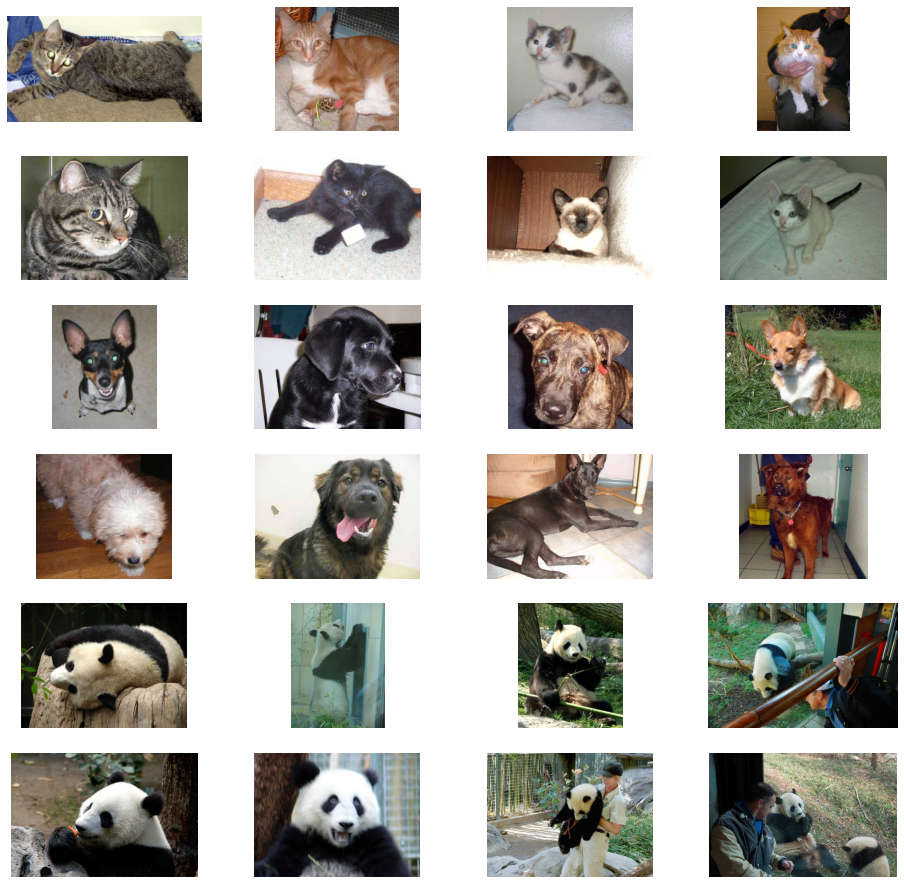

In [8]:
%matplotlib inline
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

# Número de linhas e colunas do arranjo para mostrar as imagens
nrows = 6
ncols = 4

# Define figura do matplotlib e define o tamanho para ser mostrada 
fig = plt.gcf()
fig.set_size_inches(16, 16)

pic_index = 8

next_cat_pix = [os.path.join(train_cats_dir, fname) 
                for fname in train_cat_fnames[pic_index-8:pic_index]]
next_dog_pix = [os.path.join(train_dogs_dir, fname) 
                for fname in train_dog_fnames[pic_index-8:pic_index]]
next_panda_pix = [os.path.join(train_pandas_dir, fname) 
                for fname in train_panda_fnames[ pic_index-8:pic_index]]

for i, img_path in enumerate(next_cat_pix+next_dog_pix+next_panda_pix):
    # Define índice da imagem
    sp = plt.subplot(nrows, ncols, i + 1)
    sp.axis('Off') # Não mostra eixos ou grids

    img = mpimg.imread(img_path)
    plt.imshow(img)

plt.show()

Observe que as imagens possuem formas e proporções diferente, dessa forma, antes de treinar uma rede Neural com essas imagens tem que ajustar as suas dimensões.

## 2. Pré-processamento dos dados

Nesse trabalho, vamos utilizar três geradores de dados para carregar as imagens dos diretórios de origem e convertê-las em tensores `float32`. Teremos um gerador para as imagens de treinamento, um para as imagens de validação e outro para as imagens de teste. Os geradores devem produzir lotes de 30 imagens, com dimensão 150x150, para classificação multiclasse.

Como você já sabe, os dados de entrada para a RNA devem ser normalizados, no caso de imagens o mais comum é ter as imagens normalizadas de forma a transformar os valores dos pixels, originalmente um número inteiro no intervalo [0, 255], para um número real no intervalo [0, 1]. 

### Exercício #3: Pré-processamento de dados

Para criar e configurar os três geradores você vai usar a classe `ImageDataGenerator` do Keras  com o parâmetro `rescale`. A classe `ImageDataGenerator` permite instanciar geradores de lotes de imagens, juntamente com os seus rótulos, usando o método `flow_from_directory (diretório)`. Esses geradores podem então ser usados com os métodos do Keras para treinamento, avaliação e previsão, que aceitam geradores de dados como entradas: `fit_generator`,` evaluate_generator` e `predict_generator`.

Os três geradores devem ser configurados e instanciados da seguinte forma:

- Normalização dos pixles para valores no intervalo [0, 1]
- Tamanho do lote = 30
- Tipo de problema: classificação multiclasse
- Dimensão das imagens: 150x150

In [9]:
# PARA VOCÊ FAZER: criar e instanciar os geradores de dados de treinamento, validação e teste

from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define dimensão das imagens
### COMECE AQUI ### (≈ 1 linha)
img_size_gen = (150,150)
### TERMINE AQUI ###

# Cria gerador usando a classe ImageDataGenerator que normaliza imagens
### COMECE AQUI ### (≈ 1 linha)
datagen = ImageDataGenerator(1./255)
### TERMINE AQUI ###

# Instancia gerador de imagens de treinamento (utilize a variável que define o diretório de dados de treinamento)
### COMECE AQUI ### (≈ 1 linha)
train_generator = datagen.flow_from_directory(directory = train_dir, target_size =  img_size_gen, batch_size = 30, class_mode = "categorical" )
### TERMINE AQUI ###

# Instancia gerador de imagens de validação (utilize a variável que define o diretório de dados de validação)
### COMECE AQUI ### (≈ 1 linha)
val_generator = datagen.flow_from_directory(directory = val_dir, target_size =  img_size_gen, batch_size = 30, class_mode = "categorical" )
### TERMINE AQUI ###

# Instancia gerador de imagens de teste (utilize a variável que define o diretório de dados de teste)
### COMECE AQUI ### (≈ 1 linha)
test_generator = datagen.flow_from_directory(directory = test_dir, target_size =  img_size_gen, batch_size = 30, class_mode = "categorical" )
### TERMINE AQUI ###

Found 1980 images belonging to 3 classes.
Found 510 images belonging to 3 classes.
Found 510 images belonging to 3 classes.


**Saída esperada:**

    Found 1980 images belonging to 3 classes.
    Found 510 images belonging to 3 classes.
    Found 510 images belonging to 3 classes.

## 3. Construir e treinar uma RNA para classificação

Para identificar o animal mostrado na imagem você utilizar uma RNA convolucional relativamente simples. Na medida em que as imagens estão em arquivos e possuem dimensões diferentes é necessário usar um gerador de dados para o treinamento da rede. 

Nessa etapa do trabalho você vai configurar uma RNA convolucional, criar geradores de dados para carregar e processar as imagens, e finalmente treinar a RNA.


### Exercício #4: Criação da RNA

Para resolver esse problema de classificação multiclasse, você vai usar uma RNA com 3 camadas convolucionais, seguidas de camadas "max-pooling", e 2 camadas densas, com as seguintes características:

- Dimensão das imagens: 150x150x3;
- Primeira camada convolucional: número de filtros 32, dimensão do filtro 3, função de ativação ReLu;
- Segunda camada convolucional: número de filtros 64, dimensão do filtro 3, função de ativação ReLu;
- Terceira camada convolucional: número de filtros 128, dimensão do filtro 3, função de ativação ReLu;
- Camadas de max-pooling: dimensão da janela 2, "stride" 2; 
- Primeira camada densa: número de neurônios 256, função de ativação ReLu;
- Camada de saída: número de neurônio 3, função de ativação softmax.

Ressalta-se que após cada camada convolucional tem-se uma camada de max-pooling.

Na célula abaixo crie uma funçao que configura uma RNA com as características acima. Não se esqueça de incluir a camada de "flattening" entre a última camada de max-pooling e a primeira camada densa.

In [0]:
# PARA VOCÊ FAZER: Função para criar RNA convolucional para classificação multiclasse

import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential 

def build_model(img_size):
    
    # Criação e configuração da RNA
    ### COMECE AQUI ### (≈ 10 linhas)
    model = Sequential()
    model.add(layers.Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu',input_shape = img_size))
    model.add(layers.MaxPooling2D(pool_size=(2,2),strides = 2))
    model.add(layers.Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu'))
    model.add(layers.MaxPooling2D(pool_size=(2,2),strides = 2))
    model.add(layers.Conv2D(filters = 128, kernel_size = (3,3), activation = 'relu'))
    model.add(layers.MaxPooling2D(pool_size=(2,2),strides = 2))
    model.add(layers.Flatten())
    model.add(layers.Dense(units = 256, activation = 'relu'))
    model.add(layers.Dense(units = 3, activation = 'softmax'))
    ### TERMINE AQUI ###

    return model  

In [11]:
# PARA VOCÊ FAZER: Criar RNA convolucional para classificação dos animais

# Define dimensão das imagens
### COMECE AQUI ### (≈ 1 linha)
img_size = (150,150,3)
### TERMINE AQUI ###

# Criação da RNA usando a função buil_model
### COMECE AQUI ### (≈ 1 linha)
rna = build_model(img_size = img_size)
### TERMINE AQUI ###

rna.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 36992)             0

**Saída esperada:**
    
    Model: "sequential"
    _________________________________________________________________
    Layer (type)                 Output Shape              Param #   
    =================================================================
    conv2d (Conv2D)              (None, 148, 148, 32)      896       
    _________________________________________________________________
    max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
    _________________________________________________________________
    conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
    _________________________________________________________________
    max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
    _________________________________________________________________
    conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
    _________________________________________________________________
    max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
    _________________________________________________________________
    flatten (Flatten)            (None, 36992)             0         
    _________________________________________________________________
    dense (Dense)                (None, 256)               9470208   
    _________________________________________________________________
    dense_1 (Dense)              (None, 3)                 771       
    =================================================================
    Total params: 9,564,227
    Trainable params: 9,564,227
    Non-trainable params: 0
    _________________________________________________________________

### Exercício #5: Compilação e treinamento da RNA

Agora você vai treinar a sua RNA usando o método de otimização Adams. Assim, na célula abaixo, compile e treine a sua RNA usando os seguinte hiperparâmetros:

- método de otimização: Adam;
- taxa de aprendizagem = 0.001;
- número de épocas = 20;
- verbose = 2.

Cuidado para definir os parâmetros `steps_per_epoch` e `validation_steps` de forma a utilizar todos as iamgens de treinamento e de validação. Lembre que temos 1980 imagens de treinamento, 510 imagens de validação e o tamanho dos lotes é de 30 imagens. 

Para treinamento da RNA, utilize o método `fit_generator` e os geradores de dados de treinamento e validação. 

Não se esquça de definir a função de custo apropriada para classificação multiclasse e escolher a métrica exatidão.

In [12]:
# PARA VOCÊ FAZER: compilar e treinar a RNA

from tensorflow.keras import optimizers

# Comiplação da RNA
### COMECE AQUI ### (≈ 2 linhas)
adam = optimizers.Adam(learning_rate=0.001) 
rna.compile(loss='categorical_crossentropy', metrics=['accuracy'],optimizer=adam)
### TERMINE AQUI ###

# Treinamento da RNA
### COMECE AQUI ### (≈ 1 comando)
history = rna.fit_generator(train_generator,steps_per_epoch = (1980/30),epochs = 20,validation_data = val_generator,validation_steps = (510/30),verbose = 2)
#### TERMINE AQUI ###

Instructions for updating:
Please use Model.fit, which supports generators.


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/20
66/66 - 11s - loss: 33.6984 - accuracy: 0.4490 - val_loss: 0.9151 - val_accuracy: 0.5196
Epoch 2/20
66/66 - 11s - loss: 0.8570 - accuracy: 0.5919 - val_loss: 0.8511 - val_accuracy: 0.5569
Epoch 3/20
66/66 - 11s - loss: 0.6934 - accuracy: 0.6753 - val_loss: 0.9247 - val_accuracy: 0.5176
Epoch 4/20
66/66 - 11s - loss: 0.5751 - accuracy: 0.7394 - val_loss: 0.9332 - val_accuracy: 0.5392
Epoch 5/20
66/66 - 11s - loss: 0.4518 - accuracy: 0.7889 - val_loss: 1.0728 - val_accuracy: 0.5529
Epoch 6/20
66/66 - 11s - loss: 0.3391 - accuracy: 0.8495 - val_loss: 1.1098 - val_accuracy: 0.5392
Epoch 7/20
66/66 - 11s - loss: 0.2664 - accuracy: 0.8854 - val_loss: 1.2765 - val_accuracy: 0.5843
Epoch 8/20
66/66 - 11s - loss: 0.2457 - accuracy: 0.8955 - val_loss: 1.6212 - val_accuracy: 0.5922
Epoch 9/20
66/66 - 11s - loss: 0.1865 - accuracy: 0.9273 - val_loss: 1.6114 - val_accuracy: 0.5745
Epoch 10/20
66/66 - 11s - loss: 0.1382 - accuracy: 0.9460 - val_loss: 1.8242 - val_accuracy: 0.5706
Epoch 11

**Saída esperada:**

    Epoch 1/20
    66/66 - 9s - loss: 0.9156 - accuracy: 0.5429 - val_loss: 0.7954 - val_accuracy: 0.5784
    Epoch 2/20
    66/66 - 9s - loss: 0.6867 - accuracy: 0.6515 - val_loss: 0.6980 - val_accuracy: 0.6686
    .
    .
    .
    Epoch 19/20
    66/66 - 9s - loss: 4.3007e-04 - accuracy: 1.0000 - val_loss: 2.1578 - val_accuracy: 0.6863
    Epoch 20/20
    66/66 - 9s - loss: 3.3048e-04 - accuracy: 1.0000 - val_loss: 2.1160 - val_accuracy: 0.7000

### Visualização dos resultados de treinamento

Execute a célula abaixo para visualizar a função de custo e a exatidão em função do número de épocas de treinamento e verificar se o treinamento foi satisfatório.

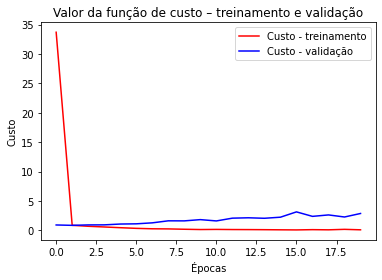

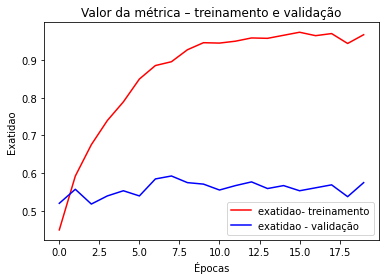

In [13]:
# Recupera resultados de treinamento do dicinário history
acc      = history.history['accuracy']
val_acc  = history.history['val_accuracy']
loss     = history.history['loss']
val_loss = history.history['val_loss']

# Cria vetor de épocas
epocas   = range(len(acc)) 

# Gráfico dos valores da função de custo
plt.plot(epocas, loss, 'r', label='Custo - treinamento')
plt.plot(epocas, val_loss, 'b', label='Custo - validação')
plt.title('Valor da função de custo – treinamento e validação')
plt.xlabel('Épocas')
plt.ylabel('Custo')
plt.legend()
plt.show()

# Gráfico dos valores da métrica
plt.plot(epocas, acc, 'r', label='exatidao- treinamento')
plt.plot(epocas, val_acc, 'b', label='exatidao - validação')
plt.title('Valor da métrica – treinamento e validação')
plt.xlabel('Épocas')
plt.ylabel('Exatidao')
plt.legend()
plt.show()

### Avaliação do desempenho da RNA

Execute a célula abaixo para calcular a função de custo e a métrica de forma a avaliar o desempenho da RNA.

In [14]:
# Calcula a função de custo e a métrica para os dados de treinamento, validação e teste
custo_metrica_train = rna.evaluate_generator(train_generator, steps=66) 
custo_metrica_val = rna.evaluate_generator(val_generator, steps=17) 
custo_metrica_test = rna.evaluate_generator(test_generator, steps=17) 

print(custo_metrica_train)
print(custo_metrica_val)
print(custo_metrica_test)

Instructions for updating:
Please use Model.evaluate, which supports generators.


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


[0.0483507364988327, 0.9838383793830872]
[2.869556427001953, 0.5745097994804382]
[3.094594955444336, 0.5627450942993164]


**Saída esperada:**

    [0.0025995231699198484, 1.0]
    [2.1967246532440186, 0.6921568512916565]
    [2.334252119064331, 0.6980392336845398]

### Análise dos resultados

Como você pode observar essa RNA está com problema de "overfitting". Isso pode ser observado de duas formas:

1) O comportamento da função de custo e da métrica para os dados de validação e para os dados de treinamento. Enquanto que a tendência da função de custo é de diminuir e da métrica (exatidão) é de aumentar para os dados de treinamento durante todo o treinamento, para os dados de validação após algumas épocas, a função de custo aumenta e a exatidão diminui. Esse comportamento é tipico de problemas de "overfitting".

2) Enquanto que a exatidão para os dados de treinamento é de 100%, para os dados de validação é de apenas cerca de 70%.

3) **Importante:** Observe que não adianta treinar a RNA por um número maior de épocas que o seu desempenho não vai melhorar.

Como temos um número relativamente pequeno de exemplos de treinamento (1.980) o problema de "overfitting" é quase impossível de evitar, mas temos que eliminá-lo senão a nossa RNA não tem nenhuma utilidade. Como já visto, "overfitting" ocorre quando uma RNA é treinada com poucos exemplos e, assim, aprende padrões que não generalizam para novos dados, ou seja, quando a RNA começa a usar caracteríticas irrelevantes presentes nos dados para fazer previsões. Por exemplo, se você, como humano, vê apenas três imagens de pessoas que são lenhadores e três imagens de pessoas que são marinheiros, e entre elas a única pessoa que usa boné é um lenhador, você pode começar a pensar que usar boné é um sinal de ser lenhador em oposição a um marinheiro. Ao fazer isso, você faria um classificador de lenhador/marinheiro muito deficiente.

Com já visto o problema de "overfitting" é um dos principais problemas do aprendizado de máquina. Dado que estamos ajustando os parâmetros de nosso modelo para um determinado conjunto de dados, como podemos garantir que as representações aprendidas pelo modelo sejam aplicáveis a dados nunca vistos antes? Como evitamos aprender coisas específicas presentes nos dados de treinamento? 

Nós já vimos e testamos alguns métodos de regularização. No restante desse trabalho você vai usar geração artifical de dados ("data augmentation") para tentar minimizar o problema de "overfitting" dessa RNA.

### Teste da RNA com novas imagens

O código da célula abaixo permite que você escolher um ou mais arquivos que estão no seu computador, carregar esses arquivos e utilizar a sua RNA para prever se a imagem carregada mostra um gato, ou um cão, ou um panda. Observa-se que esse código somente funciona se você estiver utilizando o Colab.

**Observação.** Um bom site da internet para obter imagens em geral é o pixabay (https://pixabay.com/pt/).

In [0]:
# Importa bibliotecas e funções
import numpy as np
from google.colab import files
from keras.preprocessing import image

# Função do Colab para carregar arquivos
uploaded = files.upload()

for fn in uploaded.keys():
    path = '/content/' + fn
    # Carrega imagens usando função do Keras
    img = image.load_img(path, target_size=(150, 150))
  
    # Converte imagem para tensor e acrescenta eixo dos exemplos
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    images = np.vstack([x])
  
    # Calcula previsão da RNA e determina classe
    y_prev = rna.predict(images, batch_size=10)
    classe = np.argmax(y_prev)
  
    # Apresenta classe identificada
    if classe==0:
        print(fn + " é um gato")
    elif classe==1:
        print(fn + " é um cão")
    else:
        print(fn + " é um panda")

Saving dog-1194087_640.jpg to dog-1194087_640.jpg
dog-1194087_640.jpg é um cão


## 4. Treinamento com geração artificial de dados

Para treinar a sua RNA com "data augmentation" você precisa de um gerador de dados de treinamento que além de carregar as imagens, normalizá-las, redimensioná-las e convertê-las em tensores de números reais, deve também modificá-las aplicando transformações aleatórias. Isso perimte que a RNA seja treinada sempre com novas imagens, mas obviamente que são imagens criadas artificialmente baseadas nas imagens originais de treinamento. 

Como não se deve realizar transformações das imagens de validação e teste, podemos utilizar para carregar e pré-processar essas imagens os mesmos geradores que criamos anteriormente, ou seja, `val_generator` e `test_generator`. Dessa forma precisamos criar e instanciar somente um novo gerador para as imagens de treinamento.

### Exercício #6: Gerador de dados de treinamento com "data augmentation"

Para criar e configurar o gerador de imagens de treinamento com "data augmentation" você deve usar o mesmo procedimento realizado no exercício #3. Esse gerador devem ser configurado e instanciado da seguinte forma:

- Normalização dos pixles para valores no intervalo [0, 1]
- Tamanho do lote = 30
- Tipo de problema: classificação multiclasse
- Dimensão das imagens: 150x150
- Redução/ampliação de 20%
- Angulo de rotação no intervalo de +-20 graus
- Translação vertical e horizontal de 0,2
- Inversão horizontal
- Alteração do brilho entre 0,5 e 1,1
- Método de preenchimento de lacunas: borda

In [0]:
# PARA VOCÊ FAZER: compilar e treinar a RNA

from tensorflow.keras.preprocessing.image import ImageDataGenerator

img_size_gen = (150, 150)

# Criação do gerador de dados de treinamento com "data augmentation"
### COMECE AQUI ### (≈ 1 comando)
#aug_datagen =
### TERMINE AQUI ###

# Instancia gerador de imagens de treinamento (utilize a variável que define o diretório de dados de treinamento)
### COMECE AQUI ### (≈ 1 comando)
#aug_train_generator = 
### TERMINE AQUI ###

**Saída esperada:**

    Found 1980 images belonging to 3 classes.

### Exercício #7: Teste do gerador com "data augmentation"

Modifique a célula abaixo para executar o gerador de imagens com "data augmentation" de forma a  criar um lote de imagens transformadas. Utilize para isso o método `next()`.

In [0]:
# PARA VOCÊ FAZER: testar gerador com "data augmentation"

import numpy as np

# Inicializa tensores de imagens e saídas
imagens, y = [], []

# Executa o gerador uma única vez
### COMECE AQUI ### (≈ 1 linha)
#imagens, y = 
### TERMINE AQUI ###

# Tranforma a saída da rede que é uma probabilidade de mostrar um dos animais na classe prevista.
# Para isso use a função argmax com axis=1.
### COMECE AQUI ### (≈ 1 linha)
#classes = 
### TERMINE AQUI ###

# Apresenta as classes previstas
print('Img No. - Classe (one_hot) - Classe (inteiro)')
for i in range(classes.shape[0]):
    print(i, y[i], classes[i])

**Saída esperada:**
    
    Img No. - Classe (one_hot) - Classe (inteiro)
    0 [0. 1. 0.] 1
    1 [1. 0. 0.] 0
    2 [1. 0. 0.] 0
    3 [1. 0. 0.] 0
    4 [0. 0. 1.] 2
    5 [0. 0. 1.] 2
    6 [1. 0. 0.] 0
    7 [0. 1. 0.] 1
    8 [1. 0. 0.] 0
    9 [0. 1. 0.] 1
    10 [0. 0. 1.] 2
    11 [1. 0. 0.] 0
    12 [0. 1. 0.] 1
    13 [0. 0. 1.] 2
    14 [1. 0. 0.] 0
    15 [0. 0. 1.] 2
    16 [1. 0. 0.] 0
    17 [1. 0. 0.] 0
    18 [0. 0. 1.] 2
    19 [0. 0. 1.] 2
    20 [1. 0. 0.] 0
    21 [0. 0. 1.] 2
    22 [0. 1. 0.] 1
    23 [1. 0. 0.] 0
    24 [0. 0. 1.] 2
    25 [0. 0. 1.] 2
    26 [0. 1. 0.] 1
    27 [0. 0. 1.] 2
    28 [0. 1. 0.] 1
    29 [0. 0. 1.] 2

### Visualização das imagens transformadas

Execute a célula abaixo para visualizar o lote de imagens transformadas.

In [0]:
fig = plt.figure(figsize=(8, 32))

nrows = 10
ncols = 3

print('Classes das imagens =', classes)

i = 0
for img in imagens:
# Set up subplot; subplot indices start at 1
    plt.subplot(nrows, ncols, i + 1)
    plt.imshow(img)
    i = i + 1
plt.show()


### Exercício #8: Compilação e treinamento da RNA

Agora você vai treinar a sua RNA usando o método de otimização Adams e o gerador de dados com "data augmentation". Assim, na célula abaixo, crie uma nova RNA, compile e treine usando os seguintes hiperparâmetros:

- método de otimização: Adam;
- taxa de aprendizagem = 0.001;
- número de épocas = 30;
- verbose = 2.

Para esse treinamento com "data augmentation" oberve os seguintes pontos:

- Cuidado para definir os parâmetros `steps_per_epoch` e `validation_steps` de forma a utilizar todos as imagens de treinamento e de validação. Lembre que temos 1980 imagens de treinamento, 510 imagens de validação e o tamanho dos lotes é de 30 imagens. 
- Para treinar a RNA, utilize o método `fit_generator`, o gerador de dados de treinamento com "data augmentation, e o gerador de dados de validação definidos anteriormente. 
- Utilize a mesma função de custo e a mesma métrica usadas anteriormentes.

**Importante:** Com "data augmentation" temos que treinar a RNA por um número maior de épocas para que ela seja capaz de generalizar os dados de treinamento de forma adequada.

In [0]:
# PARA VOCÊ FAZER: Criar, compilar e treinar a RNA com "data augmentation"

from tensorflow.keras import optimizers

# Cria RNA usando a função build_model
### COMECE AQUI ### (≈ 1 linha)
#rna2 = 
### TERMINE AQUI ###

# Comiplação da RNA
### COMECE AQUI ### (≈ 2 linhas)
#adam = 
#rna2.
### TERMINE AQUI ###

# Treinamento da RNA
### COMECE AQUI ### (≈ 1 comando)
#history = 
### TERMINE AQUI ###

**Saída esperada:**

    Epoch 1/30
    66/66 - 19s - loss: 0.9874 - accuracy: 0.4939 - val_loss: 0.7968 - val_accuracy: 0.5843
    Epoch 2/30
    66/66 - 19s - loss: 0.8382 - accuracy: 0.5823 - val_loss: 0.7492 - val_accuracy: 0.5843
    Epoch 3/30
    .
    .
    .
    Epoch 29/30
    66/66 - 19s - loss: 0.4986 - accuracy: 0.7566 - val_loss: 0.6341 - val_accuracy: 0.7824
    Epoch 30/30
    66/66 - 19s - loss: 0.4823 - accuracy: 0.7773 - val_loss: 0.6664 - val_accuracy: 0.7745

### Visualização dos resultados de treinamento

Execute a célula abaixo para visualizar a função de custo e a exatidão em função do número de épocas de treinamento e verificar se o treinamento foi satisfatório.

In [0]:
# Recupera resultados de treinamento do dicinário history
acc      = history.history['accuracy']
val_acc  = history.history['val_accuracy']
loss     = history.history['loss']
val_loss = history.history['val_loss']

# Cria vetor de épocas
epocas   = range(len(acc)) 

# Gráfico dos valores da função de custo
plt.plot(epocas, loss, 'r', label='Custo - treinamento')
plt.plot(epocas, val_loss, 'b', label='Custo - validação')
plt.title('Valor da função de custo – treinamento e validação')
plt.xlabel('Épocas')
plt.ylabel('Custo')
plt.legend()
plt.show()

# Gráfico dos valores da métrica
plt.plot(epocas, acc, 'r', label='exatidao- treinamento')
plt.plot(epocas, val_acc, 'b', label='exatidao - validação')
plt.title('Valor da métrica – treinamento e validação')
plt.xlabel('Épocas')
plt.ylabel('Exatidao')
plt.legend()
plt.show()

### Avaliação do desempenho da RNA

Execute a célula abaixo para calcular a função de custo e a métrica de forma a avaliar o desempenho da RNA.

In [0]:
# Calcula a função de custo e a métrica para os dados de treinamento, validação e teste
custo_metrica_train = rna2.evaluate_generator(train_generator, steps=66) 
custo_metrica_val = rna2.evaluate_generator(val_generator, steps=17) 
custo_metrica_test = rna2.evaluate_generator(test_generator, steps=17) 

print(custo_metrica_train)
print(custo_metrica_val)
print(custo_metrica_test)

**Saída esperada:**
    
    [0.38780757784843445, 0.8287878632545471]
    [0.5447821617126465, 0.7549019455909729]
    [0.48929181694984436, 0.7862744927406311]

### Análise dos resultados

Como você pode observar essa RNA treinada com "data augmetation" apresenta menos problema de "overfitting". Isso pode ser observado pelo seguinte:

1) O comportamento da função de custo e da métrica para os dados de validação não divergem tanto em relação aos valores dos dados de treinamento, como era no caso sem "data augmentation".

2) Os valores das métrica para os dados de validação e de teste são mais próximos dos valores obtidos para os dados de treinamento.

3) O desempenho da RNA para as imagens de teste aumentou cerca de 5%, o que pode ser considerado um bom resultado tendo em vista que não tivemos quase nenhum trabalho para produzir novos exemplos de terinamento.


### Teste da RNA com novas imagens

Execute a célula abaixo para escolher um ou mais arquivos que estão no seu computador, carregar esses arquivos e utilizar a sua RNA com "data augmentation" para prever se a imagem carregada mostra um gato, ou um cão, ou um panda. Observa-se que esse código somente funciona se você estiver utilizando o Colab.


In [0]:
# Importa bibliotecas e funções
import numpy as np
from google.colab import files
from keras.preprocessing import image

# Função do Colab para carregar arquivos
uploaded = files.upload()

for fn in uploaded.keys():
    path = '/content/' + fn
    # Carrega imagens usando função do Keras
    img = image.load_img(path, target_size=(150, 150))
  
    # Converte imagem para tensor e acrescenta eixo dos exemplos
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    images = np.vstack([x])
  
    # Calcula previsão da RNA e determina classe
    y_prev = rna.predict(images, batch_size=10)
    classe = np.argmax(y_prev)
  
    # Apresenta classe identificada
    if classe==0:
        print(fn + " é um gato")
    elif classe==1:
        print(fn + " é um cão")
    else:
        print(fn + " é um panda")

## Conclusão

As conclusões que podemos extrair desse trabalho são as seguintes:

1) Geração artificial de dados ("data augmentation") é uma ferramenta poderosa para minimizar problemas de "overfitting". Mas obviamente tem as suas limitações, pois os novos exemplos são criados a partir dos exemplos existentes, ou seja, não se criam de fato novos exemplos.

2) "Data augmentation" quando aplicado em conjunto com outras técnicas de regularização, tais como, regularização L2 e "dropout" tem a capacidade de eliminar "overfitting" e, assim, obter RNAs capazes de apresentar um alto desempenho, até mesmo superior ao dos seres humanos.

## Finalizando

Antes de sair do Colab ou inciar um outro notebook, execute a célula abaixo para finalizar o kernel e liberar memória.

In [0]:
import os, signal
os.kill(os.getpid(), signal.SIGKILL)